In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import itertools as it
sns.set_style('ticks', {'font.family':'serif', 'font.serif':'Times New Roman'})

import systems
import utils

In [2]:
matplotlib.rcParams['text.usetex'] = True
sns.set(style="ticks")
plt.rc('font', family='serif')
plt.rc('font', serif='Times')

bigfont = 18
medfont = 14
smallfont = 18

In [3]:
Astar, Bstar, Q, R = systems.example1()
_, Kstar = utils.dlqr(Astar, Bstar, Q, R)
Jstar = utils.LQR_cost(Astar, Bstar, Kstar, Q, R, 1)
J0 = utils.LQR_cost(Astar, Bstar, np.zeros((Bstar.shape[1], Bstar.shape[0])), Q, R, 1)

In [4]:
step_sizes = [1e-3, 1e-4, 1e-5, 1e-6]
sigma_etas = [1, 1e-1, 1e-2, 1e-3]

In [5]:
collect = []
for idx, (sigma_eta, step_size) in enumerate(it.product(sigma_etas, step_sizes)):
    fname = 'data/dfo_experiment_sigma_eta_{}_step_size_{}.npz'.format(sigma_eta, step_size)
    data = np.load(fname)
    data = data['arr_0']
    data = np.median(data, axis=0)
    if np.isfinite(data).all():
        collect.append((idx, data))
    print(idx, sigma_eta, step_size)

0 1 0.001
1 1 0.0001
2 1 1e-05
3 1 1e-06
4 0.1 0.001
5 0.1 0.0001
6 0.1 1e-05
7 0.1 1e-06
8 0.01 0.001
9 0.01 0.0001
10 0.01 1e-05
11 0.01 1e-06
12 0.001 0.001
13 0.001 0.0001
14 0.001 1e-05
15 0.001 1e-06


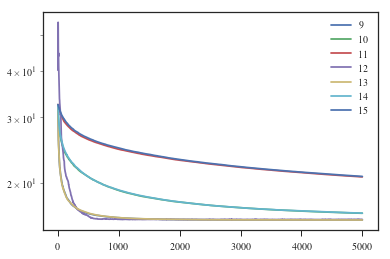

In [6]:
for idx, data in collect:
    plt.semilogy(data)
plt.legend([idx for idx, _ in collect])


In [7]:
collect = []
for idx, (sigma_eta, step_size) in enumerate(it.product(sigma_etas, step_sizes)):
    fname = 'data/pg_experiment_sigma_eta_{}_step_size_{}_baseline_simple.npz'.format(sigma_eta, step_size)
    data = np.load(fname)
    data = data['arr_0']
    data = np.median(data, axis=0)
    if np.isfinite(data).all():
        collect.append((idx, data))
    print(idx, sigma_eta, step_size)

0 1 0.001
1 1 0.0001
2 1 1e-05
3 1 1e-06
4 0.1 0.001
5 0.1 0.0001
6 0.1 1e-05
7 0.1 1e-06
8 0.01 0.001
9 0.01 0.0001
10 0.01 1e-05
11 0.01 1e-06
12 0.001 0.001
13 0.001 0.0001
14 0.001 1e-05
15 0.001 1e-06


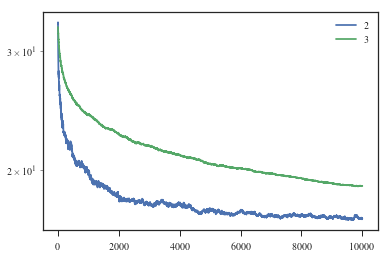

In [8]:
for idx, data in collect:
    plt.semilogy(data)
plt.legend([idx for idx, _ in collect])

In [9]:
dfo_sigma_eta, dfo_step_size = 0.001, 0.0001
pg_sigma_eta, pg_step_size = 1, 1e-05

In [10]:
dfo_fname = 'data/dfo_experiment_sigma_eta_{}_step_size_{}.npz'.format(dfo_sigma_eta, dfo_step_size)
dfo_data = np.load(dfo_fname)
dfo_data = dfo_data['arr_0']
dfo_data = (dfo_data - Jstar)/Jstar

pg_simple_fname = 'data/pg_experiment_sigma_eta_{}_step_size_{}_baseline_simple.npz'.format(pg_sigma_eta, pg_step_size)
pg_simple_data = np.load(pg_simple_fname)
pg_simple_data = pg_simple_data['arr_0']
pg_simple_data = (pg_simple_data - Jstar)/Jstar

pg_vf_fname = 'data/pg_experiment_sigma_eta_{}_step_size_{}_baseline_value_function.npz'.format(pg_sigma_eta, pg_step_size)
pg_vf_data = np.load(pg_vf_fname)
pg_vf_data = pg_vf_data['arr_0']
pg_vf_data = (pg_vf_data - Jstar)/Jstar

In [11]:
nominal_fname = 'data/nominal_experiment.npz'
nominal_data = np.load(nominal_fname)
nominal_data = nominal_data['arr_0']
nominal_data = (nominal_data - Jstar)/Jstar

In [12]:
#policy_iteration_fname = 'data/policy_iteration_experiment_num_pi_iters_2_horizon_length_500000.npz'
policy_iteration_fname = 'data/policy_iteration_experiment_num_pi_iters_3_horizon_length_333333.npz'
#policy_iteration_fname = 'data/policy_iteration_experiment_num_pi_iters_4_horizon_length_250000.npz'

policy_iteration_data = np.load(policy_iteration_fname)
policy_iteration_data = policy_iteration_data['arr_0']
policy_iteration_data = (policy_iteration_data - Jstar)/Jstar

In [13]:
#policy_iteration_no_clamp_upper_fname = 'data/policy_iteration_no_clamp_upper_experiment_num_pi_iters_2_horizon_length_500000_no_clamp_upper.npz'
policy_iteration_no_clamp_upper_fname = 'data/policy_iteration_experiment_num_pi_iters_3_horizon_length_333333_no_clamp_upper.npz'
#policy_iteration_no_clamp_upper_fname = 'data/policy_iteration_no_clamp_upper_experiment_num_pi_iters_4_horizon_length_250000_no_clamp_upper.npz'

policy_iteration_no_clamp_upper_data = np.load(policy_iteration_no_clamp_upper_fname)
policy_iteration_no_clamp_upper_data = policy_iteration_no_clamp_upper_data['arr_0']
policy_iteration_no_clamp_upper_data = (policy_iteration_no_clamp_upper_data - Jstar)/Jstar

In [14]:
policy_iteration_full_fname = 'data/policy_iteration_full_experiment_n_pi_iters_15.npz'
policy_iteration_full_data = np.load(policy_iteration_full_fname)
policy_iteration_full_data = policy_iteration_full_data['arr_0']
policy_iteration_full_data = (policy_iteration_full_data - Jstar)/Jstar

In [15]:
nominal_90th = np.percentile(nominal_data, 90, axis=0)
nominal_median = np.median(nominal_data, axis=0)
nominal_10th = np.percentile(nominal_data, 10, axis=0)
nominal_axis = 100 * (1 + np.arange(len(nominal_median)))

In [16]:
policy_iteration_90th = np.percentile(policy_iteration_data, 90, axis=0)
policy_iteration_median = np.median(policy_iteration_data, axis=0)
policy_iteration_10th = np.percentile(policy_iteration_data, 10, axis=0)

#policy_iteration_axis = 500000 * (1 + np.arange(len(policy_iteration_median)))
policy_iteration_axis = 333333 * (1 + np.arange(len(policy_iteration_median)))
#policy_iteration_axis = 250000 * (1 + np.arange(len(policy_iteration_median)))

init_rel_cost = (J0 - Jstar)/Jstar
policy_iteration_90th = np.append([init_rel_cost], policy_iteration_90th)
policy_iteration_median = np.append([init_rel_cost], policy_iteration_median)
policy_iteration_10th = np.append([init_rel_cost], policy_iteration_10th)
policy_iteration_axis = np.append([0], policy_iteration_axis)

In [17]:
policy_iteration_no_clamp_upper_90th = np.percentile(policy_iteration_no_clamp_upper_data, 90, axis=0)
policy_iteration_no_clamp_upper_median = np.median(policy_iteration_no_clamp_upper_data, axis=0)
policy_iteration_no_clamp_upper_10th = np.percentile(policy_iteration_no_clamp_upper_data, 10, axis=0)

#policy_iteration_no_clamp_upper_axis = 500000 * (1 + np.arange(len(policy_iteration_no_clamp_upper_median)))
policy_iteration_no_clamp_upper_axis = 333333 * (1 + np.arange(len(policy_iteration_no_clamp_upper_median)))
#policy_iteration_no_clamp_upper_axis = 250000 * (1 + np.arange(len(policy_iteration_no_clamp_upper_median)))

init_rel_cost = (J0 - Jstar)/Jstar
policy_iteration_no_clamp_upper_90th = np.append([init_rel_cost], policy_iteration_no_clamp_upper_90th)
policy_iteration_no_clamp_upper_median = np.append([init_rel_cost], policy_iteration_no_clamp_upper_median)
policy_iteration_no_clamp_upper_10th = np.append([init_rel_cost], policy_iteration_no_clamp_upper_10th)
policy_iteration_no_clamp_upper_axis = np.append([0], policy_iteration_no_clamp_upper_axis)

In [18]:
policy_iteration_full_90th = np.percentile(policy_iteration_full_data, 90, axis=0)
policy_iteration_full_median = np.median(policy_iteration_full_data, axis=0)
policy_iteration_full_10th = np.percentile(policy_iteration_full_data, 10, axis=0)
policy_iteration_full_axis = 1000 * (1 + np.arange(len(policy_iteration_full_median)))

In [19]:
dfo_90th = np.percentile(dfo_data, 90, axis=0)
dfo_median = np.median(dfo_data, axis=0)
dfo_10th = np.percentile(dfo_data, 10, axis=0)
dfo_axis = 200 * (1 + np.arange(len(dfo_median)))

In [20]:
pg_simple_90th = np.percentile(pg_simple_data, 90, axis=0)
pg_simple_median = np.median(pg_simple_data, axis=0)
pg_simple_10th = np.percentile(pg_simple_data, 10, axis=0)
pg_simple_axis = 100 * (1 + np.arange(len(pg_simple_median)))
pg_simple_90th[np.isinf(pg_simple_90th)] = 1e10 # clip

In [21]:
pg_vf_90th = np.percentile(pg_vf_data, 90, axis=0)
pg_vf_median = np.median(pg_vf_data, axis=0)
pg_vf_10th = np.percentile(pg_vf_data, 10, axis=0)
pg_vf_axis = 100 * (1 + np.arange(len(pg_vf_median)))

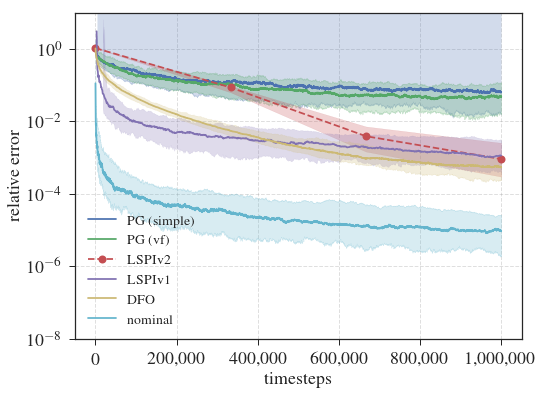

In [26]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
colors = sns.color_palette(n_colors=7)


plt.semilogy(pg_simple_axis, pg_simple_median, color=colors[0], markersize=8)
plt.fill_between(pg_simple_axis, pg_simple_10th, pg_simple_90th, color=colors[0], alpha=0.25, edgecolor=None)

plt.semilogy(pg_vf_axis, pg_vf_median, color=colors[1], markersize=8)
plt.fill_between(pg_vf_axis, pg_vf_10th, pg_vf_90th, alpha=0.25, color=colors[1], edgecolor=None)

plt.semilogy(policy_iteration_no_clamp_upper_axis, policy_iteration_no_clamp_upper_median, '--o', color=colors[2], markersize=8)
plt.fill_between(policy_iteration_no_clamp_upper_axis, policy_iteration_no_clamp_upper_10th, policy_iteration_no_clamp_upper_90th, 
                 color=colors[2], alpha=0.25, edgecolor=None)

plt.semilogy(policy_iteration_full_axis, policy_iteration_full_median, color=colors[3], markersize=8)
plt.fill_between(policy_iteration_full_axis, policy_iteration_full_10th, policy_iteration_full_90th, 
                 color=colors[3], alpha=0.25, edgecolor=None)

plt.semilogy(dfo_axis, dfo_median, color=colors[4], markersize=8)
plt.fill_between(dfo_axis, dfo_10th, dfo_90th, 
                 color=colors[4], alpha=0.25, edgecolor=None)

# plt.semilogy(sarsa_axis, sarsa_median, color=colors[6], markersize=8)
# plt.fill_between(sarsa_axis, sarsa_10th, sarsa_90th, 
#                  color=colors[6], alpha=0.25, edgecolor=None)

plt.semilogy(nominal_axis, nominal_median, color=colors[5], markersize=8)
plt.fill_between(nominal_axis, nominal_10th, nominal_90th, 
                 color=colors[5], alpha=0.25, edgecolor=None)

plt.legend(['PG (simple)', 'PG (vf)', 'LSPIv2', 'LSPIv1', 'DFO', 'nominal'], fontsize=medfont, markerscale=1, framealpha=1, frameon=False, loc='lower left')
plt.ylabel('relative error', fontsize=bigfont)
plt.xlabel('timesteps', fontsize=bigfont)
plt.xticks(fontsize=smallfont)
plt.yticks(fontsize=smallfont)
plt.ylim([1e-8, 10])
plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig('plots/model_free_comparison_neurips19.pdf', bbox_inches='tight')